In [33]:
  #importing required libraries
import pandas as pd
import numpy as np 
import nltk
import re
import urlextract
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns


#  Preprocesssing textual data


from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# additional nltk resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-d

In [4]:
# Importing required data AND Overview
df = pd.read_csv(r"C:\Users\sukan\ipba\csv\comments_for_video_wGBoppe3ZqQ.csv")
df.head(25)



,Comment Number,Reply Number,Like Count,Published At,Text
0,1.0,NaN,0,2023-02-24T21:49:40Z,Thank you for this.
1,2.0,NaN,0,2023-02-24T18:56:11Z,"That wasn't an apology, it was one excuse after another."
2,3.0,NaN,0,2023-02-23T00:40:54Z,Those are probably children that are trafficked in the entertainment industry
3,4.0,NaN,0,2023-02-23T00:40:49Z,Those are probably children that are trafficked in the entertainment industry
4,5.0,NaN,0,2023-02-19T13:26:47Z,"Epstein and his group of elitists abused their power and saw the girls they used as nothing more than trash... but let's not go tabloid, Michael. Paedophilia is sexual attraction to prepubescent children and that doesn't describe the girls they used as their play things. \n\nWhat we are seeing in these 'adverts' IS for paedophiles."
5,6.0,NaN,0,2023-02-19T05:21:41Z,"The blind could see there is an evil attack, a demonic war being waged on our minds, hearts and spirits."
6,7.0,NaN,0,2023-02-18T20:09:59Z,"Another thing I found is in one of the child ads there’s a kids drawing in the background literally depicting satan. There also a folded black satanic robe. And in the same ad, there’s balenciaga tape. Except on it balenciaga is spelt “baal-enciaga” with the part “Baal” facing the camera. And ofc Baal is one of the idols they worshipped in biblical times and was known for child sacrifice. Similar to the child sacrifice we see in todays culture with this over sexualization, abortion, etc. On top of that, similarly how you translated “ba len ci aga” into Latin and it says “do what you want” (a known satanic phrase) if you type “Baal enci aga” it translates to Baal is king. They’re literally not even hiding it anymore because of how normalized it’s become"
7,8.0,NaN,0,2023-02-18T14:54:31Z,They are sorry they got caught
8,9.0,NaN,0,2023-02-17T23:17:16Z,Madeleine McCann used to carry a teddy bear around with her all the time
9,10.0,NaN,0,2023-02-17T19:54:57Z,Wyta. weird sex things is and has always been a right w thing not left. Also I am a centrist I’m above you all 👈👉 😂


In [5]:
df.shape[0]

5844

In [6]:
df.isna().sum()

Comment Number    1244
Reply Number      4600
Like Count           0
Published At         0
Text                 0
dtype: int64

In [7]:
df.columns

Index(['Comment Number', 'Reply Number', 'Like Count', 'Published At', 'Text'], dtype='object')

In [8]:
# Changing name of 'text' column to 'Comments' column
df.rename(columns = {'Text':'Comments'}, inplace = True)

In [9]:
df.columns

Index(['Comment Number', 'Reply Number', 'Like Count', 'Published At',
       'Comments'],
      dtype='object')

In [10]:
df.isna().sum()

Comment Number    1244
Reply Number      4600
Like Count           0
Published At         0
Comments             0
dtype: int64

In [11]:
##  Descriptive Statistics

In [12]:
## Creating Length Feature
df['text_length'] = df['Comments'].apply(lambda x : len(x))


<AxesSubplot:ylabel='Frequency'>

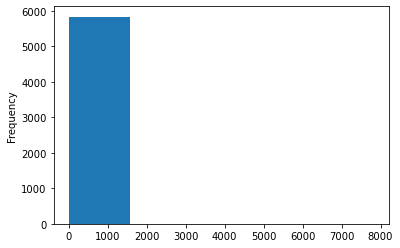

In [16]:
df['text_length'].plot.hist(bins = 5)

In [17]:
# Null or missing value rows detection

null_rows = df[df['Comments'].isnull()]

print(null_rows)

Empty DataFrame
Columns: [Comment Number, Reply Number, Like Count, Published At, Comments, text_length]
Index: []


In [19]:
## converting Comments to strings
df['Comments'] = df['Comments'].astype(str)
df.shape

(5844, 6)

In [20]:
#### Cleaning--- puntuations removal,lowercase, extra spaces & url removals

In [21]:
##Removing punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [22]:
df['Comments'].apply(remove_punctuations)

0                                                                                                                                                                                                                                                                                                                       Thank you for this
1                                                                                                                                                                                                                                                                                    That wasnt an apology it was one excuse after another
2                                                                                                                                                                                                                                                            Those are probably children that are trafficked in the entertainment industry
3      

In [23]:
## lowercase
df['Comments'].apply(lambda x: x.lower())

0                                                                                                                                                                                                                                                                                                                                 thank you for this.
1                                                                                                                                                                                                                                                                                            that wasn't an apology, it was one excuse after another.
2                                                                                                                                                                                                                                                                       those are probably children that are trafficked in t

In [24]:
# Commit to Table
df['Comments'] = df['Comments'].apply(lambda x: x.lower())

In [25]:
## Extra spaces and URLs removal
df['Comments'] = df['Comments'].apply(lambda x: re.sub(r'https?\S+', '', x).strip())

In [26]:
df.head(20)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length
0,1.0,NaN,0,2023-02-24T21:49:40Z,thank you for this.,19
1,2.0,NaN,0,2023-02-24T18:56:11Z,"that wasn't an apology, it was one excuse after another.",56
2,3.0,NaN,0,2023-02-23T00:40:54Z,those are probably children that are trafficked in the entertainment industry,77
3,4.0,NaN,0,2023-02-23T00:40:49Z,those are probably children that are trafficked in the entertainment industry,77
4,5.0,NaN,0,2023-02-19T13:26:47Z,"epstein and his group of elitists abused their power and saw the girls they used as nothing more than trash... but let's not go tabloid, michael. paedophilia is sexual attraction to prepubescent children and that doesn't describe the girls they used as their play things. \n\nwhat we are seeing in these 'adverts' is for paedophiles.",331
5,6.0,NaN,0,2023-02-19T05:21:41Z,"the blind could see there is an evil attack, a demonic war being waged on our minds, hearts and spirits.",104
6,7.0,NaN,0,2023-02-18T20:09:59Z,"another thing i found is in one of the child ads there’s a kids drawing in the background literally depicting satan. there also a folded black satanic robe. and in the same ad, there’s balenciaga tape. except on it balenciaga is spelt “baal-enciaga” with the part “baal” facing the camera. and ofc baal is one of the idols they worshipped in biblical times and was known for child sacrifice. similar to the child sacrifice we see in todays culture with this over sexualization, abortion, etc. on top of that, similarly how you translated “ba len ci aga” into latin and it says “do what you want” (a known satanic phrase) if you type “baal enci aga” it translates to baal is king. they’re literally not even hiding it anymore because of how normalized it’s become",762
7,8.0,NaN,0,2023-02-18T14:54:31Z,they are sorry they got caught,30
8,9.0,NaN,0,2023-02-17T23:17:16Z,madeleine mccann used to carry a teddy bear around with her all the time,72
9,10.0,NaN,0,2023-02-17T19:54:57Z,wyta. weird sex things is and has always been a right w thing not left. also i am a centrist i’m above you all 👈👉 😂,115


In [27]:
##### Tokenization using tweet tokenizer

In [28]:
import nltk
from nltk.tokenize import TweetTokenizer

# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
df['Tokens'] = df['Comments'].apply(tokenize_tweet)

In [29]:
df.head(20)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length,Tokens
0,1.0,NaN,0,2023-02-24T21:49:40Z,thank you for this.,19,"[thank, you, for, this, .]"
1,2.0,NaN,0,2023-02-24T18:56:11Z,"that wasn't an apology, it was one excuse after another.",56,"[that, wasn't, an, apology, ,, it, was, one, excuse, after, another, .]"
2,3.0,NaN,0,2023-02-23T00:40:54Z,those are probably children that are trafficked in the entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
3,4.0,NaN,0,2023-02-23T00:40:49Z,those are probably children that are trafficked in the entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
4,5.0,NaN,0,2023-02-19T13:26:47Z,"epstein and his group of elitists abused their power and saw the girls they used as nothing more than trash... but let's not go tabloid, michael. paedophilia is sexual attraction to prepubescent children and that doesn't describe the girls they used as their play things. \n\nwhat we are seeing in these 'adverts' is for paedophiles.",331,"[epstein, and, his, group, of, elitists, abused, their, power, and, saw, the, girls, they, used, as, nothing, more, than, trash, ..., but, let's, not, go, tabloid, ,, michael, ., paedophilia, is, sexual, attraction, to, prepubescent, children, and, that, doesn't, describe, the, girls, they, used, as, their, play, things, ., what, we, are, seeing, in, these, ', adverts, ', is, for, paedophiles, .]"
5,6.0,NaN,0,2023-02-19T05:21:41Z,"the blind could see there is an evil attack, a demonic war being waged on our minds, hearts and spirits.",104,"[the, blind, could, see, there, is, an, evil, attack, ,, a, demonic, war, being, waged, on, our, minds, ,, hearts, and, spirits, .]"
6,7.0,NaN,0,2023-02-18T20:09:59Z,"another thing i found is in one of the child ads there’s a kids drawing in the background literally depicting satan. there also a folded black satanic robe. and in the same ad, there’s balenciaga tape. except on it balenciaga is spelt “baal-enciaga” with the part “baal” facing the camera. and ofc baal is one of the idols they worshipped in biblical times and was known for child sacrifice. similar to the child sacrifice we see in todays culture with this over sexualization, abortion, etc. on top of that, similarly how you translated “ba len ci aga” into latin and it says “do what you want” (a known satanic phrase) if you type “baal enci aga” it translates to baal is king. they’re literally not even hiding it anymore because of how normalized it’s become",762,"[another, thing, i, found, is, in, one, of, the, child, ads, there, ’, s, a, kids, drawing, in, the, background, literally, depicting, satan, ., there, also, a, folded, black, satanic, robe, ., and, in, the, same, ad, ,, there, ’, s, balenciaga, tape, ., except, on, it, balenciaga, is, spelt, “, baal-enciaga, ”, with, the, part, “, baal, ”, facing, the, camera, ., and, ofc, baal, is, one, of, the, idols, they, worshipped, in, biblical, times, and, was, known, for, child, sacrifice, ., similar, to, the, child, sacrifice, we, see, in, todays, culture, with, this, over, sexualization, ,, abortion, ,, ...]"
7,8.0,NaN,0,2023-02-18T14:54:31Z,they are sorry they got caught,30,"[they, are, sorry, they, got, caught]"
8,9.0,NaN,0,2023-02-17T23:17:16Z,madeleine mccann used to carry a teddy bear around with her all the time,72,"[madeleine, mccann, used, to, carry, a, teddy, bear, around, with, her, all, the, time]"
9,10.0,NaN,0,2023-02-17T19:54:57Z,wyta. weird sex things is and has always been a right w thing not left. also i am a centrist i’m above you all 👈👉 😂,115,"[wyta, ., weird, sex, things, is, and, has, always, been, a, right, w, thing, not, left, ., also, i, am, a, centrist, i, ’, m, above, you, all, 👈, 👉, 😂]"


In [30]:
### removing stopwords,special characters and numbers

In [31]:
# Retrieve Stopwords
stop = stopwords.words('english')

In [32]:
# Tokenize and Remove Stop Words
df['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                                                                                                                                                                                                                                      [thank, this.]
1                                                                                                                                                                                                                   [apology,, one, excuse, another.]
2                                                                                                                                                                                           [probably, children, trafficked, entertainment, industry]
3                                                                                                                                                                                           [probably, children, trafficked, entertainment, industry]
4       [epstein

In [36]:
df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0                                                                                                                                                                                                             thank this.
1                                                                                                                                                                                            apology, one excuse another.
2                                                                                                                                                                     probably children trafficked entertainment industry
3                                                                                                                                                                     probably children trafficked entertainment industry
4       epstein group elitists abused power saw girls used nothing trash... let's go tabloid, michael. paedophilia sexual attrac

In [37]:
# Join the words back
df['Comments'] = df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [38]:
df.head(10)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length,Tokens
0,1.0,NaN,0,2023-02-24T21:49:40Z,thank this.,19,"[thank, you, for, this, .]"
1,2.0,NaN,0,2023-02-24T18:56:11Z,"apology, one excuse another.",56,"[that, wasn't, an, apology, ,, it, was, one, excuse, after, another, .]"
2,3.0,NaN,0,2023-02-23T00:40:54Z,probably children trafficked entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
3,4.0,NaN,0,2023-02-23T00:40:49Z,probably children trafficked entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
4,5.0,NaN,0,2023-02-19T13:26:47Z,"epstein group elitists abused power saw girls used nothing trash... let's go tabloid, michael. paedophilia sexual attraction prepubescent children describe girls used play things. seeing 'adverts' paedophiles.",331,"[epstein, and, his, group, of, elitists, abused, their, power, and, saw, the, girls, they, used, as, nothing, more, than, trash, ..., but, let's, not, go, tabloid, ,, michael, ., paedophilia, is, sexual, attraction, to, prepubescent, children, and, that, doesn't, describe, the, girls, they, used, as, their, play, things, ., what, we, are, seeing, in, these, ', adverts, ', is, for, paedophiles, .]"
5,6.0,NaN,0,2023-02-19T05:21:41Z,"blind could see evil attack, demonic war waged minds, hearts spirits.",104,"[the, blind, could, see, there, is, an, evil, attack, ,, a, demonic, war, being, waged, on, our, minds, ,, hearts, and, spirits, .]"
6,7.0,NaN,0,2023-02-18T20:09:59Z,"another thing found one child ads there’s kids drawing background literally depicting satan. also folded black satanic robe. ad, there’s balenciaga tape. except balenciaga spelt “baal-enciaga” part “baal” facing camera. ofc baal one idols worshipped biblical times known child sacrifice. similar child sacrifice see todays culture sexualization, abortion, etc. top that, similarly translated “ba len ci aga” latin says “do want” (a known satanic phrase) type “baal enci aga” translates baal king. they’re literally even hiding anymore normalized it’s become",762,"[another, thing, i, found, is, in, one, of, the, child, ads, there, ’, s, a, kids, drawing, in, the, background, literally, depicting, satan, ., there, also, a, folded, black, satanic, robe, ., and, in, the, same, ad, ,, there, ’, s, balenciaga, tape, ., except, on, it, balenciaga, is, spelt, “, baal-enciaga, ”, with, the, part, “, baal, ”, facing, the, camera, ., and, ofc, baal, is, one, of, the, idols, they, worshipped, in, biblical, times, and, was, known, for, child, sacrifice, ., similar, to, the, child, sacrifice, we, see, in, todays, culture, with, this, over, sexualization, ,, abortion, ,, ...]"
7,8.0,NaN,0,2023-02-18T14:54:31Z,sorry got caught,30,"[they, are, sorry, they, got, caught]"
8,9.0,NaN,0,2023-02-17T23:17:16Z,madeleine mccann used carry teddy bear around time,72,"[madeleine, mccann, used, to, carry, a, teddy, bear, around, with, her, all, the, time]"
9,10.0,NaN,0,2023-02-17T19:54:57Z,wyta. weird sex things always right w thing left. also centrist i’m 👈👉 😂,115,"[wyta, ., weird, sex, things, is, and, has, always, been, a, right, w, thing, not, left, ., also, i, am, a, centrist, i, ’, m, above, you, all, 👈, 👉, 😂]"


In [40]:
##Removing numbers

df['Comments'] = df['Comments'].apply(lambda x: re.sub(r'\d+', '', x))

In [44]:
##Removing non-ASCII improperly encoded characters

def remove_invalid_chars(text):
    # encode the text string using ASCII encoding
    encoded_text = text.encode('ascii', 'ignore')
    # decode the encoded text using ASCII encoding
    decoded_text = encoded_text.decode('ascii')
    return decoded_text
# apply the remove_invalid_chars function to the 'Comments' column
df['Comments'] = df['Comments'].apply(remove_invalid_chars)

In [45]:
df.head(15)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length,Tokens
0,1.0,NaN,0,2023-02-24T21:49:40Z,thank this.,19,"[thank, you, for, this, .]"
1,2.0,NaN,0,2023-02-24T18:56:11Z,"apology, one excuse another.",56,"[that, wasn't, an, apology, ,, it, was, one, excuse, after, another, .]"
2,3.0,NaN,0,2023-02-23T00:40:54Z,probably children trafficked entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
3,4.0,NaN,0,2023-02-23T00:40:49Z,probably children trafficked entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
4,5.0,NaN,0,2023-02-19T13:26:47Z,"epstein group elitists abused power saw girls used nothing trash... let's go tabloid, michael. paedophilia sexual attraction prepubescent children describe girls used play things. seeing 'adverts' paedophiles.",331,"[epstein, and, his, group, of, elitists, abused, their, power, and, saw, the, girls, they, used, as, nothing, more, than, trash, ..., but, let's, not, go, tabloid, ,, michael, ., paedophilia, is, sexual, attraction, to, prepubescent, children, and, that, doesn't, describe, the, girls, they, used, as, their, play, things, ., what, we, are, seeing, in, these, ', adverts, ', is, for, paedophiles, .]"
5,6.0,NaN,0,2023-02-19T05:21:41Z,"blind could see evil attack, demonic war waged minds, hearts spirits.",104,"[the, blind, could, see, there, is, an, evil, attack, ,, a, demonic, war, being, waged, on, our, minds, ,, hearts, and, spirits, .]"
6,7.0,NaN,0,2023-02-18T20:09:59Z,"another thing found one child ads theres kids drawing background literally depicting satan. also folded black satanic robe. ad, theres balenciaga tape. except balenciaga spelt baal-enciaga part baal facing camera. ofc baal one idols worshipped biblical times known child sacrifice. similar child sacrifice see todays culture sexualization, abortion, etc. top that, similarly translated ba len ci aga latin says do want (a known satanic phrase) type baal enci aga translates baal king. theyre literally even hiding anymore normalized its become",762,"[another, thing, i, found, is, in, one, of, the, child, ads, there, ’, s, a, kids, drawing, in, the, background, literally, depicting, satan, ., there, also, a, folded, black, satanic, robe, ., and, in, the, same, ad, ,, there, ’, s, balenciaga, tape, ., except, on, it, balenciaga, is, spelt, “, baal-enciaga, ”, with, the, part, “, baal, ”, facing, the, camera, ., and, ofc, baal, is, one, of, the, idols, they, worshipped, in, biblical, times, and, was, known, for, child, sacrifice, ., similar, to, the, child, sacrifice, we, see, in, todays, culture, with, this, over, sexualization, ,, abortion, ,, ...]"
7,8.0,NaN,0,2023-02-18T14:54:31Z,sorry got caught,30,"[they, are, sorry, they, got, caught]"
8,9.0,NaN,0,2023-02-17T23:17:16Z,madeleine mccann used carry teddy bear around time,72,"[madeleine, mccann, used, to, carry, a, teddy, bear, around, with, her, all, the, time]"
9,10.0,NaN,0,2023-02-17T19:54:57Z,wyta. weird sex things always right w thing left. also centrist im,115,"[wyta, ., weird, sex, things, is, and, has, always, been, a, right, w, thing, not, left, ., also, i, am, a, centrist, i, ’, m, above, you, all, 👈, 👉, 😂]"


In [46]:
### Lemmatize

In [47]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [48]:
df['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

0                                                                                                                                                                                                             thank this.
1                                                                                                                                                                                            apology, one excuse another.
2                                                                                                                                                                     probably children trafficked entertainment industry
3                                                                                                                                                                     probably children trafficked entertainment industry
4       epstein group elitists abused power saw girls used nothing trash... let's go tabloid, michael. paedophilia sexual attrac

In [49]:
# Commit to Table

df['Comments'] = df['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

In [50]:
### POS Tagging

In [51]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [52]:
# Applying the POS tagging function to the 'Comments' column
df['POS_Tagged'] = df['Comments'].apply(pos_tagging)

In [53]:
df['POS_Tagged']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                      [(thank, NN), (this, DT), (., .)]
1                                                                                                                                                                                                                                                                                                                                                                                                                [(apology, NN), (,, ,), (one, CD), (excuse, NN), (another, DT), (., .)]
2                                                     

In [54]:
### Model selections and preparations
# Huggingface pipeline for quick and easy way to run sentiment predictions
# VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
# Roberta Pretrained Model

In [55]:
## 1-[Huggingface pipeline]--- quick and easy way to run sentiment predictions
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\sukan\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sukan\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [56]:
df.head(15)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length,Tokens,POS_Tagged
0,1.0,NaN,0,2023-02-24T21:49:40Z,thank this.,19,"[thank, you, for, this, .]","[(thank, NN), (this, DT), (., .)]"
1,2.0,NaN,0,2023-02-24T18:56:11Z,"apology, one excuse another.",56,"[that, wasn't, an, apology, ,, it, was, one, excuse, after, another, .]","[(apology, NN), (,, ,), (one, CD), (excuse, NN), (another, DT), (., .)]"
2,3.0,NaN,0,2023-02-23T00:40:54Z,probably children trafficked entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]","[(probably, RB), (children, NNS), (trafficked, VBD), (entertainment, NN), (industry, NN)]"
3,4.0,NaN,0,2023-02-23T00:40:49Z,probably children trafficked entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]","[(probably, RB), (children, NNS), (trafficked, VBD), (entertainment, NN), (industry, NN)]"
4,5.0,NaN,0,2023-02-19T13:26:47Z,"epstein group elitists abused power saw girls used nothing trash... let's go tabloid, michael. paedophilia sexual attraction prepubescent children describe girls used play things. seeing 'adverts' paedophiles.",331,"[epstein, and, his, group, of, elitists, abused, their, power, and, saw, the, girls, they, used, as, nothing, more, than, trash, ..., but, let's, not, go, tabloid, ,, michael, ., paedophilia, is, sexual, attraction, to, prepubescent, children, and, that, doesn't, describe, the, girls, they, used, as, their, play, things, ., what, we, are, seeing, in, these, ', adverts, ', is, for, paedophiles, .]","[(epstein, NN), (group, NN), (elitists, VBZ), (abused, JJ), (power, NN), (saw, VBD), (girls, NNS), (used, VBN), (nothing, NN), (trash, NN), (..., :), (let, NN), ('s, POS), (go, VB), (tabloid, NN), (,, ,), (michael, NN), (., .), (paedophilia, JJ), (sexual, JJ), (attraction, NN), (prepubescent, NN), (children, NNS), (describe, VBP), (girls, NNS), (used, VBN), (play, NN), (things, NNS), (., .), (seeing, VBG), ('adverts, NNS), (', POS), (paedophiles, NNS), (., .)]"
5,6.0,NaN,0,2023-02-19T05:21:41Z,"blind could see evil attack, demonic war waged minds, hearts spirits.",104,"[the, blind, could, see, there, is, an, evil, attack, ,, a, demonic, war, being, waged, on, our, minds, ,, hearts, and, spirits, .]","[(blind, NN), (could, MD), (see, VB), (evil, JJ), (attack, NN), (,, ,), (demonic, JJ), (war, NN), (waged, VBD), (minds, NNS), (,, ,), (hearts, NNS), (spirits, NNS), (., .)]"
6,7.0,NaN,0,2023-02-18T20:09:59Z,"another thing found one child ads theres kids drawing background literally depicting satan. also folded black satanic robe. ad, theres balenciaga tape. except balenciaga spelt baal-enciaga part baal facing camera. ofc baal one idols worshipped biblical times known child sacrifice. similar child sacrifice see todays culture sexualization, abortion, etc. top that, similarly translated ba len ci aga latin says do want (a known satanic phrase) type baal enci aga translates baal king. theyre literally even hiding anymore normalized its become",762,"[another, thing, i, found, is, in, one, of, the, child, ads, there, ’, s, a, kids, drawing, in, the, background, literally, depicting, satan, ., there, also, a, folded, black, satanic, robe, ., and, in, the, same, ad, ,, there, ’, s, balenciaga, tape, ., except, on, it, balenciaga, is, spelt, “, baal-enciaga, ”, with, the, part, “, baal, ”, facing, the, camera, ., and, ofc, baal, is, one, of, the, idols, they, worshipped, in, biblical, times, and, was, known, for, child, sacrifice, ., similar, to, the, child, sacrifice, we, see, in, todays, culture, with, this, over, sexualization, ,, abortion, ,, ...]","[(another, DT), (thing, NN), (found, VBD), (one, CD), (child, NN), (ads, NNS), (theres, VBZ), (kids, NNS), (drawing, VBG), (background, NN), (literally, RB), (depicting, VBG), (satan, NN), (., .), (also, RB), (folded, VBD), (black, JJ), (satanic, JJ), (robe, NN), (., .), (ad, NN), (,, ,), (theres, VBZ),

In [57]:
sent_pipeline('probably children trafficked entertainment industry	')

[{'label': 'NEGATIVE', 'score': 0.979620635509491}]

In [61]:
sent_pipeline('madeleine mccann used carry teddy bear around time	')

[{'label': 'NEGATIVE', 'score': 0.9652188420295715}]

In [59]:
sent_pipeline('thank this.	')

[{'label': 'POSITIVE', 'score': 0.9998310804367065}]

In [62]:
## 2.[VADER Seniment Scoring]---We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

#This uses a "bag of words" approach:1.Stop words are removed 2.each word is scored and combined to a total score.

In [63]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [64]:
sia = SentimentIntensityAnalyzer()

In [65]:
sia.polarity_scores('probably children trafficked entertainment industry	')

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

In [66]:
sia.polarity_scores('madeleine mccann used carry teddy bear around time	')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [67]:
sia.polarity_scores('thank this.	')

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [79]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Comments']
    myid = row['Comment Number']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/5844 [00:00<?, ?it/s]

In [80]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})


In [82]:
# Now we have sentiment score and metadata
vaders.head(25)

,Id,neg,neu,pos,compound
0,1.0,0.000,0.286,0.714,0.3612
1,2.0,0.000,0.444,0.556,0.1280
2,3.0,0.000,0.588,0.412,0.4215
3,4.0,0.000,0.588,0.412,0.4215
4,5.0,0.101,0.734,0.165,0.2732
5,6.0,0.668,0.332,0.000,-0.9337
6,7.0,0.026,0.894,0.080,0.5574
7,8.0,0.394,0.606,0.000,-0.0772
8,9.0,0.000,1.000,0.000,0.0000
9,10.0,0.145,0.855,0.000,-0.1779


In [ ]:
## 3.[Roberta Pretrained Model]--- 1.Use a model trained of a large corpus of data. , 2.Transformer model accounts for the words but also the context related to other words. 3 compare result with vader

In [86]:
## Importing model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [87]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [93]:
## To check and compare polarity scores from vader against roberta we'll create an object( lets say Sample) containing random tweet.
Sample = df['Comments'][8]
print(Sample)

madeleine mccann used carry teddy bear around time


In [94]:
sia.polarity_scores(Sample)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [96]:
# Run for Roberta Model
encoded_text = tokenizer(Sample, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.040523753, 'roberta_neu': 0.9076033, 'roberta_pos': 0.051873144}


In [97]:
def polarity_scores_roberta(Sample):
    encoded_text = tokenizer(Sample, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [98]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Comments']
        myid = row['Comment Number']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5844 [00:00<?, ?it/s]

Broke for id 1954.0


In [101]:
## Comparing the results of the two models- Vader vs Roberta
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df.columns


Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
      dtype='object')

In [102]:
results_df.head(25)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,1.0,0.000,0.286,0.714,0.3612,0.025013,0.310796,0.664191
1,2.0,0.000,0.444,0.556,0.1280,0.416372,0.541132,0.042497
2,3.0,0.000,0.588,0.412,0.4215,0.789998,0.201809,0.008192
3,4.0,0.000,0.588,0.412,0.4215,0.789998,0.201809,0.008192
4,5.0,0.101,0.734,0.165,0.2732,0.941143,0.055400,0.003457
5,6.0,0.668,0.332,0.000,-0.9337,0.761736,0.230572,0.007692
6,7.0,0.026,0.894,0.080,0.5574,0.472220,0.492932,0.034848
7,8.0,0.394,0.606,0.000,-0.0772,0.708961,0.266737,0.024302
8,9.0,0.000,1.000,0.000,0.0000,0.040524,0.907603,0.051873
9,10.0,0.145,0.855,0.000,-0.1779,0.049939,0.569521,0.380540
